In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
ds = pd.read_csv("adult.csv")
ds.replace('?', np.nan, inplace=True)
ds.dropna(inplace=True)

In [3]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
x_train[:, 1:]=imputer.fit_transform(x_train[:,1:]) 

In [6]:
x_train

array([[43, 'Self-emp-not-inc', 144928, ..., 0, 60, 'United-States'],
       [57, 'Private', 308861, ..., 0, 40, 'United-States'],
       [24, 'Private', 140001, ..., 0, 40, 'United-States'],
       ...,
       [25, 'State-gov', 194954, ..., 0, 15, 'United-States'],
       [29, 'Private', 207064, ..., 0, 40, 'United-States'],
       [42, 'Federal-gov', 34218, ..., 0, 50, 'United-States']],
      dtype=object)

In [7]:
df = pd.DataFrame(x_train, columns= ["0","1","2","3","4","5","6","7","8","9","10","11","12","13"])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,43,Self-emp-not-inc,144928,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,60,United-States
1,57,Private,308861,Some-college,10,Separated,Sales,Not-in-family,White,Female,0,0,40,United-States
2,24,Private,140001,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States
3,45,Private,473171,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
4,33,Private,150154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States


In [8]:
df["7"].value_counts()

Husband           9999
Not-in-family     6156
Own-child         3542
Unmarried         2592
Wife              1134
Other-relative     706
Name: 7, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

ordinal_categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13]

label_encoders = []
for col_index in ordinal_categorical_columns:
    le = LabelEncoder()
    x_train[:, col_index] = le.fit_transform(x_train[:, col_index])
    x_test[:, col_index] = le.transform(x_test[:, col_index])
    label_encoders.append(le)

In [10]:
from sklearn.preprocessing import LabelEncoder
lb_obj= LabelEncoder() 
y_train=lb_obj.fit_transform(y_train)
y_test=lb_obj.transform(y_test)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train_StandardScaled = scaler.fit_transform(x_train)
x_test_StandardScaled = scaler.transform(x_test)


In [12]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(x_train_StandardScaled, y_train)


LogisticRegression(random_state=0)

In [13]:
print(logistic_model.predict(scaler.transform([[0.177807, 0.088108,0.173244,1.218035,-0.036491,-0.407250,1.289114,-0.898177,0.394225,0.698654,-0.144749,-0.21852,0.851632,0.292299]])))

[0]


In [14]:
y_pred=logistic_model.predict(x_test_StandardScaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 0]]


In [15]:
from sklearn.metrics import  accuracy_score  
print(accuracy_score(y_test, y_pred))

0.8204873197414222


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


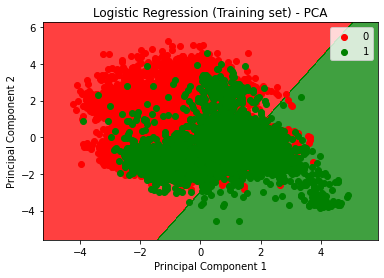

In [16]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_StandardScaled)
logistic_model.fit(x_train_pca, y_train)
x1_min, x1_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
x2_min, x2_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_grid = np.array([x1.ravel(), x2.ravel()]).T
y_pred_grid = logistic_model.predict(X_grid)
y_pred_grid = y_pred_grid.reshape(x1.shape)
plt.contourf(x1, x2, y_pred_grid, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train_pca[y_train == j, 0], x_train_pca[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set) - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


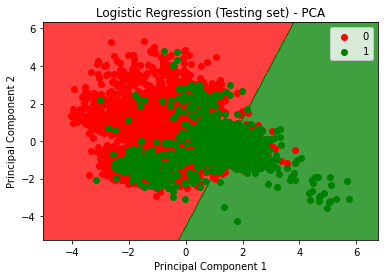

In [17]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test_StandardScaled)
logistic_model.fit(x_test_pca, y_test)
x1_min, x1_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1
x2_min, x2_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_grid = np.array([x1.ravel(), x2.ravel()]).T
y_pred_grid = logistic_model.predict(X_grid)
y_pred_grid = y_pred_grid.reshape(x1.shape)
plt.contourf(x1, x2, y_pred_grid, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test_pca[y_test == j, 0], x_test_pca[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Testing set) - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1],
    'solver': ['liblinear', 'saga']
}

logistic_model = LogisticRegression(random_state=0, max_iter=10000)
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_StandardScaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score: 0.8206721622300621


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Pyth

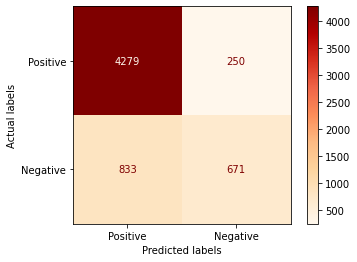

Accuracy: 0.8204873197414222
Recall: 0.4461436170212766
Precision: 0.7285559174809989
F1-score: 0.5534020618556701
AUC: 0.8532260186129107


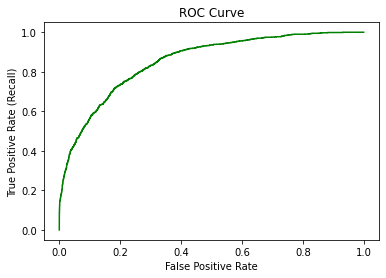

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming x_train_StandardScaled, y_train, x_test_StandardScaled, and y_test are available

# Create and fit the Logistic Regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(x_train_StandardScaled, y_train)

# Predict on the test set using the logistic regression model
y_pred = logistic_model.predict(x_test_StandardScaled)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])  # Replace with your class labels
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))  # By default, pos_label=1 for binary classification
print("Precision:", precision_score(y_test, y_pred))  # By default, pos_label=1 for binary classification
print("F1-score:", f1_score(y_test, y_pred))  # By default, pos_label=1 for binary classification

# Plotting the ROC curve and calculating the AUC
y_pred_prob = logistic_model.predict_proba(x_test_StandardScaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # Assuming 1 is your positive label
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='green')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()
